# Introduction to Logical Connectives

This notebook introduces the fundamental concepts of logical connectives in classical two-valued logic.

## Learning Objectives

By the end of this notebook, you will understand:
- What a logical connective is
- How truth tables represent connective behavior
- Standard binary connectives (AND, OR, XOR, etc.)
- Unary and nullary connectives
- How to create and manipulate connectives programmatically

In [1]:
# Setup Python path to find the src module
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✓ Project root added to path: {project_root}")

✓ Project root added to path: /home/benjamin/Documents/Philosophy/Projects/Z3/nice_connectives


## 0. Python Path Setup

First, let's ensure Python can find the project modules:

In [2]:
# Setup
from src.connectives import Connective
from src.constants import (
    AND, OR, XOR, NAND, NOR, EQUIV, IMP,
    NOT, TRUE, FALSE,
    ALL_BINARY
)
from notebooks.utils import (
    display_truth_table,
    visualize_truth_table,
    compare_connectives
)

import matplotlib.pyplot as plt
%matplotlib inline

print("✓ Setup complete")

✓ Setup complete


## 1. What is a Logical Connective?

A **logical connective** is a function that takes truth values (0 = false, 1 = true) as input and produces a truth value as output.

### Arity

The **arity** of a connective is the number of inputs it takes:
- **Nullary** (arity 0): Constants like TRUE and FALSE
- **Unary** (arity 1): Functions like NOT
- **Binary** (arity 2): Functions like AND, OR, XOR
- **Ternary** (arity 3): Three-input functions
- **n-ary** (arity n): Functions with n inputs

### Truth Tables

A **truth table** lists all possible input combinations and their corresponding outputs.

## 2. Nullary Connectives (Constants)

Nullary connectives take no inputs and always return the same value:

In [3]:
# Constants
print("TRUE:")
print(display_truth_table(TRUE))
print()

print("FALSE:")
print(display_truth_table(FALSE))

TRUE:
   output
0       1

FALSE:
   output
0       0


## 3. Unary Connectives

Unary connectives have 1 input, so there are 2 possible input combinations.
This gives us 2² = 4 possible unary connectives.

### NOT (Negation)

The most important unary connective is NOT, which flips the truth value:

NOT Truth Table:
   x0  output
0   0       1
1   1       0



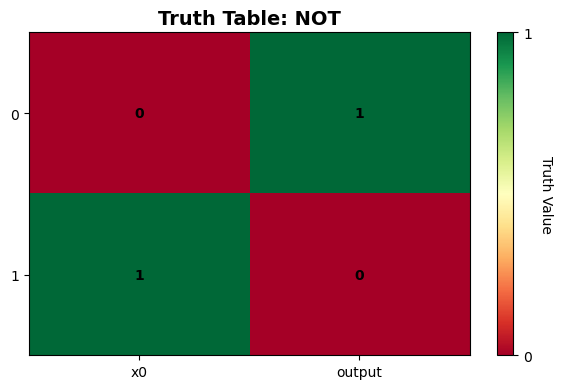

In [4]:
# NOT connective
print("NOT Truth Table:")
print(display_truth_table(NOT))
print()

# Visualize
fig = visualize_truth_table(NOT)
plt.show()

### Exercise: All Unary Connectives

Let's create all 4 possible unary connectives:

In [5]:
# All unary connectives (truth table values 0-3)
unary_connectives = [Connective(1, i) for i in range(4)]

for conn in unary_connectives:
    print(f"{conn.name}:")
    print(display_truth_table(conn))
    print()

0:
   x0  output
0   0       0
1   1       0

NOT:
   x0  output
0   0       1
1   1       0

ID:
   x0  output
0   0       0
1   1       1

1:
   x0  output
0   0       1
1   1       1



## 4. Binary Connectives

Binary connectives have 2 inputs, giving 2² = 4 possible input combinations.
This yields 2⁴ = 16 possible binary connectives.

### The Five Most Important Binary Connectives

### AND (Conjunction)

AND returns true only when both inputs are true:

In [6]:
print("AND Truth Table:")
print(display_truth_table(AND))

AND Truth Table:
   x0  x1  output
0   0   0       0
1   1   0       0
2   0   1       0
3   1   1       1


### OR (Disjunction)

OR returns true when at least one input is true:

In [7]:
print("OR Truth Table:")
print(display_truth_table(OR))

OR Truth Table:
   x0  x1  output
0   0   0       0
1   1   0       1
2   0   1       1
3   1   1       1


### XOR (Exclusive OR)

XOR returns true when inputs differ:

In [8]:
print("XOR Truth Table:")
print(display_truth_table(XOR))

XOR Truth Table:
   x0  x1  output
0   0   0       0
1   1   0       1
2   0   1       1
3   1   1       0


### NAND (NOT AND)

NAND is the negation of AND:

In [9]:
print("NAND Truth Table:")
print(display_truth_table(NAND))

NAND Truth Table:
   x0  x1  output
0   0   0       1
1   1   0       1
2   0   1       1
3   1   1       0


### IMP (Implication)

IMP represents logical implication: "if x then y":

In [10]:
print("IMP Truth Table:")
print(display_truth_table(IMP))

IMP Truth Table:
   x0  x1  output
0   0   0       1
1   1   0       0
2   0   1       1
3   1   1       1


### Comparing All Five

Let's visualize these five connectives together:

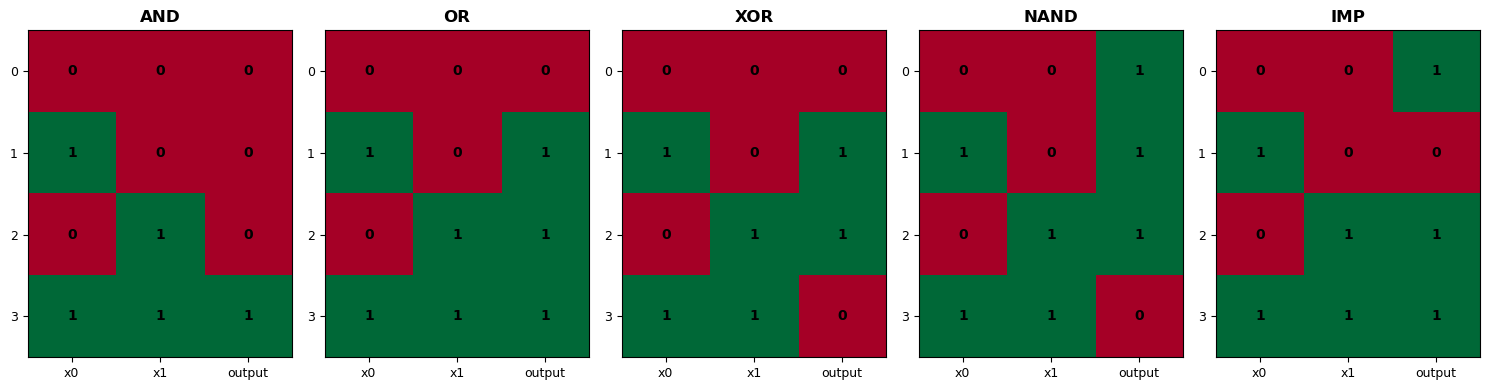

In [11]:
fig = compare_connectives(
    [AND, OR, XOR, NAND, IMP],
    titles=["AND", "OR", "XOR", "NAND", "IMP"]
)
plt.show()

## 5. All 16 Binary Connectives

The library provides all 16 binary connectives as `ALL_BINARY`:

In [12]:
# Display all binary connectives
print(f"Total binary connectives: {len(ALL_BINARY)}")
print()

for i, conn in enumerate(ALL_BINARY):
    print(f"{i+1:2d}. {conn.name:15} (truth table: {conn.truth_table_int:2d} = 0b{conn.truth_table_int:04b})")

Total binary connectives: 16

 1. FALSE_2         (truth table:  0 = 0b0000)
 2. NOR             (truth table:  1 = 0b0001)
 3. INHIBIT         (truth table:  2 = 0b0010)
 4. NOT_X           (truth table:  3 = 0b0011)
 5. CONV_INHIBIT    (truth table:  4 = 0b0100)
 6. NOT_Y           (truth table:  5 = 0b0101)
 7. XOR             (truth table:  6 = 0b0110)
 8. NAND            (truth table:  7 = 0b0111)
 9. AND             (truth table:  8 = 0b1000)
10. IFF             (truth table:  9 = 0b1001)
11. PROJ_Y          (truth table: 10 = 0b1010)
12. IMP             (truth table: 11 = 0b1011)
13. PROJ_X          (truth table: 12 = 0b1100)
14. CONV_IMP        (truth table: 13 = 0b1101)
15. OR              (truth table: 14 = 0b1110)
16. TRUE_2          (truth table: 15 = 0b1111)


### Exercise: Explore Interesting Patterns

Let's look at some interesting binary connectives:

In [13]:
# EQUIV (equivalence): returns true when inputs are equal
print("EQUIV (x ↔ y):")
print(display_truth_table(EQUIV))
print()

# NOR (NOT OR): returns true only when both inputs are false
print("NOR (¬(x ∨ y)):")
print(display_truth_table(NOR))

EQUIV (x ↔ y):
   x0  x1  output
0   0   0       1
1   1   0       0
2   0   1       0
3   1   1       1

NOR (¬(x ∨ y)):
   x0  x1  output
0   0   0       1
1   1   0       0
2   0   1       0
3   1   1       0


## 6. Creating Custom Connectives

You can create any connective by specifying its truth table value:

In [14]:
# Create a binary connective with truth table value 10
# Binary 1010 means: output = x0 (projection onto first input)
projection_x0 = Connective(2, 10)

print(f"Connective: {projection_x0.name}")
print(display_truth_table(projection_x0))
print()
print("Notice: output always equals x0 (first input)")

Connective: PROJ_Y
   x0  x1  output
0   0   0       0
1   1   0       0
2   0   1       1
3   1   1       1

Notice: output always equals x0 (first input)


## 7. Interactive Exercises

### Exercise 1: Find the Connective

What is the truth table value for a binary connective that returns true only when both inputs are false?

In [15]:
# Your answer: create the connective
mystery_connective = Connective(2, 1)  # Try different values!

print("Your connective:")
print(display_truth_table(mystery_connective))
print()
print(f"This is: {mystery_connective.name}")

Your connective:
   x0  x1  output
0   0   0       1
1   1   0       0
2   0   1       0
3   1   1       0

This is: NOR


### Exercise 2: Connective Relationships

Compare AND and NAND. What is the relationship?

In [16]:
# Compare outputs
print("AND vs NAND comparison:")
for x in [0, 1]:
    for y in [0, 1]:
        and_result = AND.evaluate(x, y)
        nand_result = NAND.evaluate(x, y)
        print(f"AND({x},{y})={and_result}, NAND({x},{y})={nand_result}, "
              f"Equal? {and_result == nand_result}")

AND vs NAND comparison:
AND(0,0)=0, NAND(0,0)=1, Equal? False
AND(0,1)=0, NAND(0,1)=1, Equal? False
AND(1,0)=0, NAND(1,0)=1, Equal? False
AND(1,1)=1, NAND(1,1)=0, Equal? False


### Exercise 3: Truth Table Value

Given this truth table, what is the truth table value?

```
x0 | x1 | output
---+----+-------
 0 |  0 |   1
 0 |  1 |   1
 1 |  0 |   1
 1 |  1 |   0
```

Hint: Read outputs from bottom to top as binary.

In [17]:
# Answer: 0111 in binary (reading row 3,2,1,0) = 7 in decimal
# But wait! Row ordering is (0,0)=row0, (0,1)=row1, (1,0)=row2, (1,1)=row3
# So outputs 1,1,1,0 → binary 0111 → decimal 7
mystery = Connective(2, 7)
print(display_truth_table(mystery))
print(f"This is: {mystery.name}")

   x0  x1  output
0   0   0       1
1   1   0       1
2   0   1       1
3   1   1       0
This is: NAND


## Summary

In this notebook, you learned:
- ✓ What logical connectives are
- ✓ Nullary (constants), unary, and binary connectives
- ✓ Standard binary connectives (AND, OR, XOR, NAND, IMP)
- ✓ All 16 binary connectives
- ✓ How to create and explore connectives programmatically

## Next Steps

- **02_truth_tables.ipynb** - Deep dive into BitVec encoding
- **03_completeness.ipynb** - Post's completeness theorem
- **04_independence.ipynb** - Independence checking